In [14]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import itertools

In [2]:
%matplotlib inline
sns.set(style='white', color_codes=True, font_scale=1.3)

## Data Exploration

In [3]:
# Simplified colors dataset
lego_colors = pd.read_csv("https://drive.google.com/uc?export=download&id=1kDzl7la0-GgnQb-ry6D_S3BmB3mGJk-m",delimiter="\t")
lego_colors.head(5)

,Color,Number of Unique Pieces,Number of Unique Sets,Number of Unique Themes,Number of Years,Max Set Size,Median Set Size
0,Aqua,55,48,15,10,1305,73
1,Black,4367,8333,373,60,5922,330
2,Blue,1822,5279,342,65,5922,300
3,Blue-Violet,35,17,3,2,987,165
4,Bright Green,257,726,131,24,5200,155


In [4]:
lego_colors.describe()
lego_colors.columns.values.tolist()

['Color',
 'Number of Unique Pieces',
 'Number of Unique Sets',
 'Number of Unique Themes',
 'Number of Years',
 'Max Set Size',
 'Median Set Size']

array([[<AxesSubplot: title={'center': 'Number of Unique Pieces'}>,
        <AxesSubplot: title={'center': 'Number of Unique Sets'}>],
       [<AxesSubplot: title={'center': 'Number of Unique Themes'}>,
        <AxesSubplot: title={'center': 'Number of Years'}>],
       [<AxesSubplot: title={'center': 'Max Set Size'}>,
        <AxesSubplot: title={'center': 'Median Set Size'}>]], dtype=object)

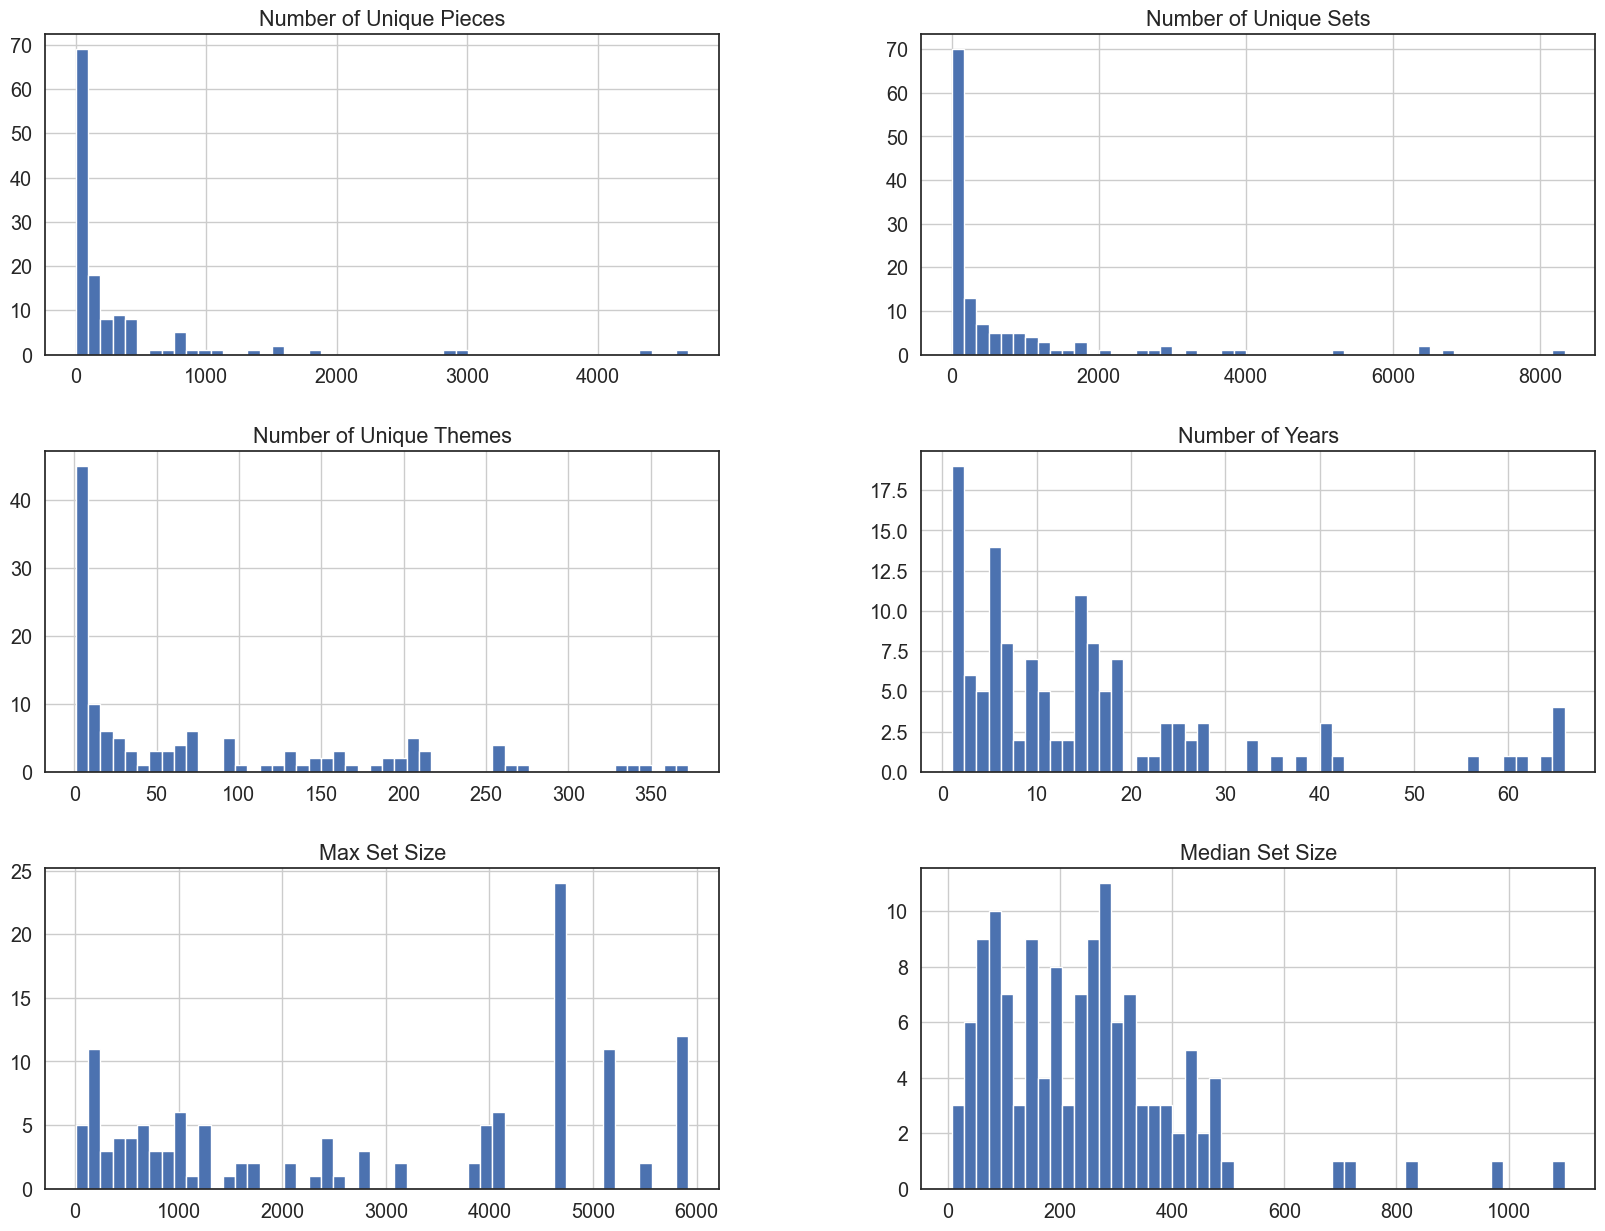

In [5]:
lego_colors.hist(bins=50, figsize=(20,15))

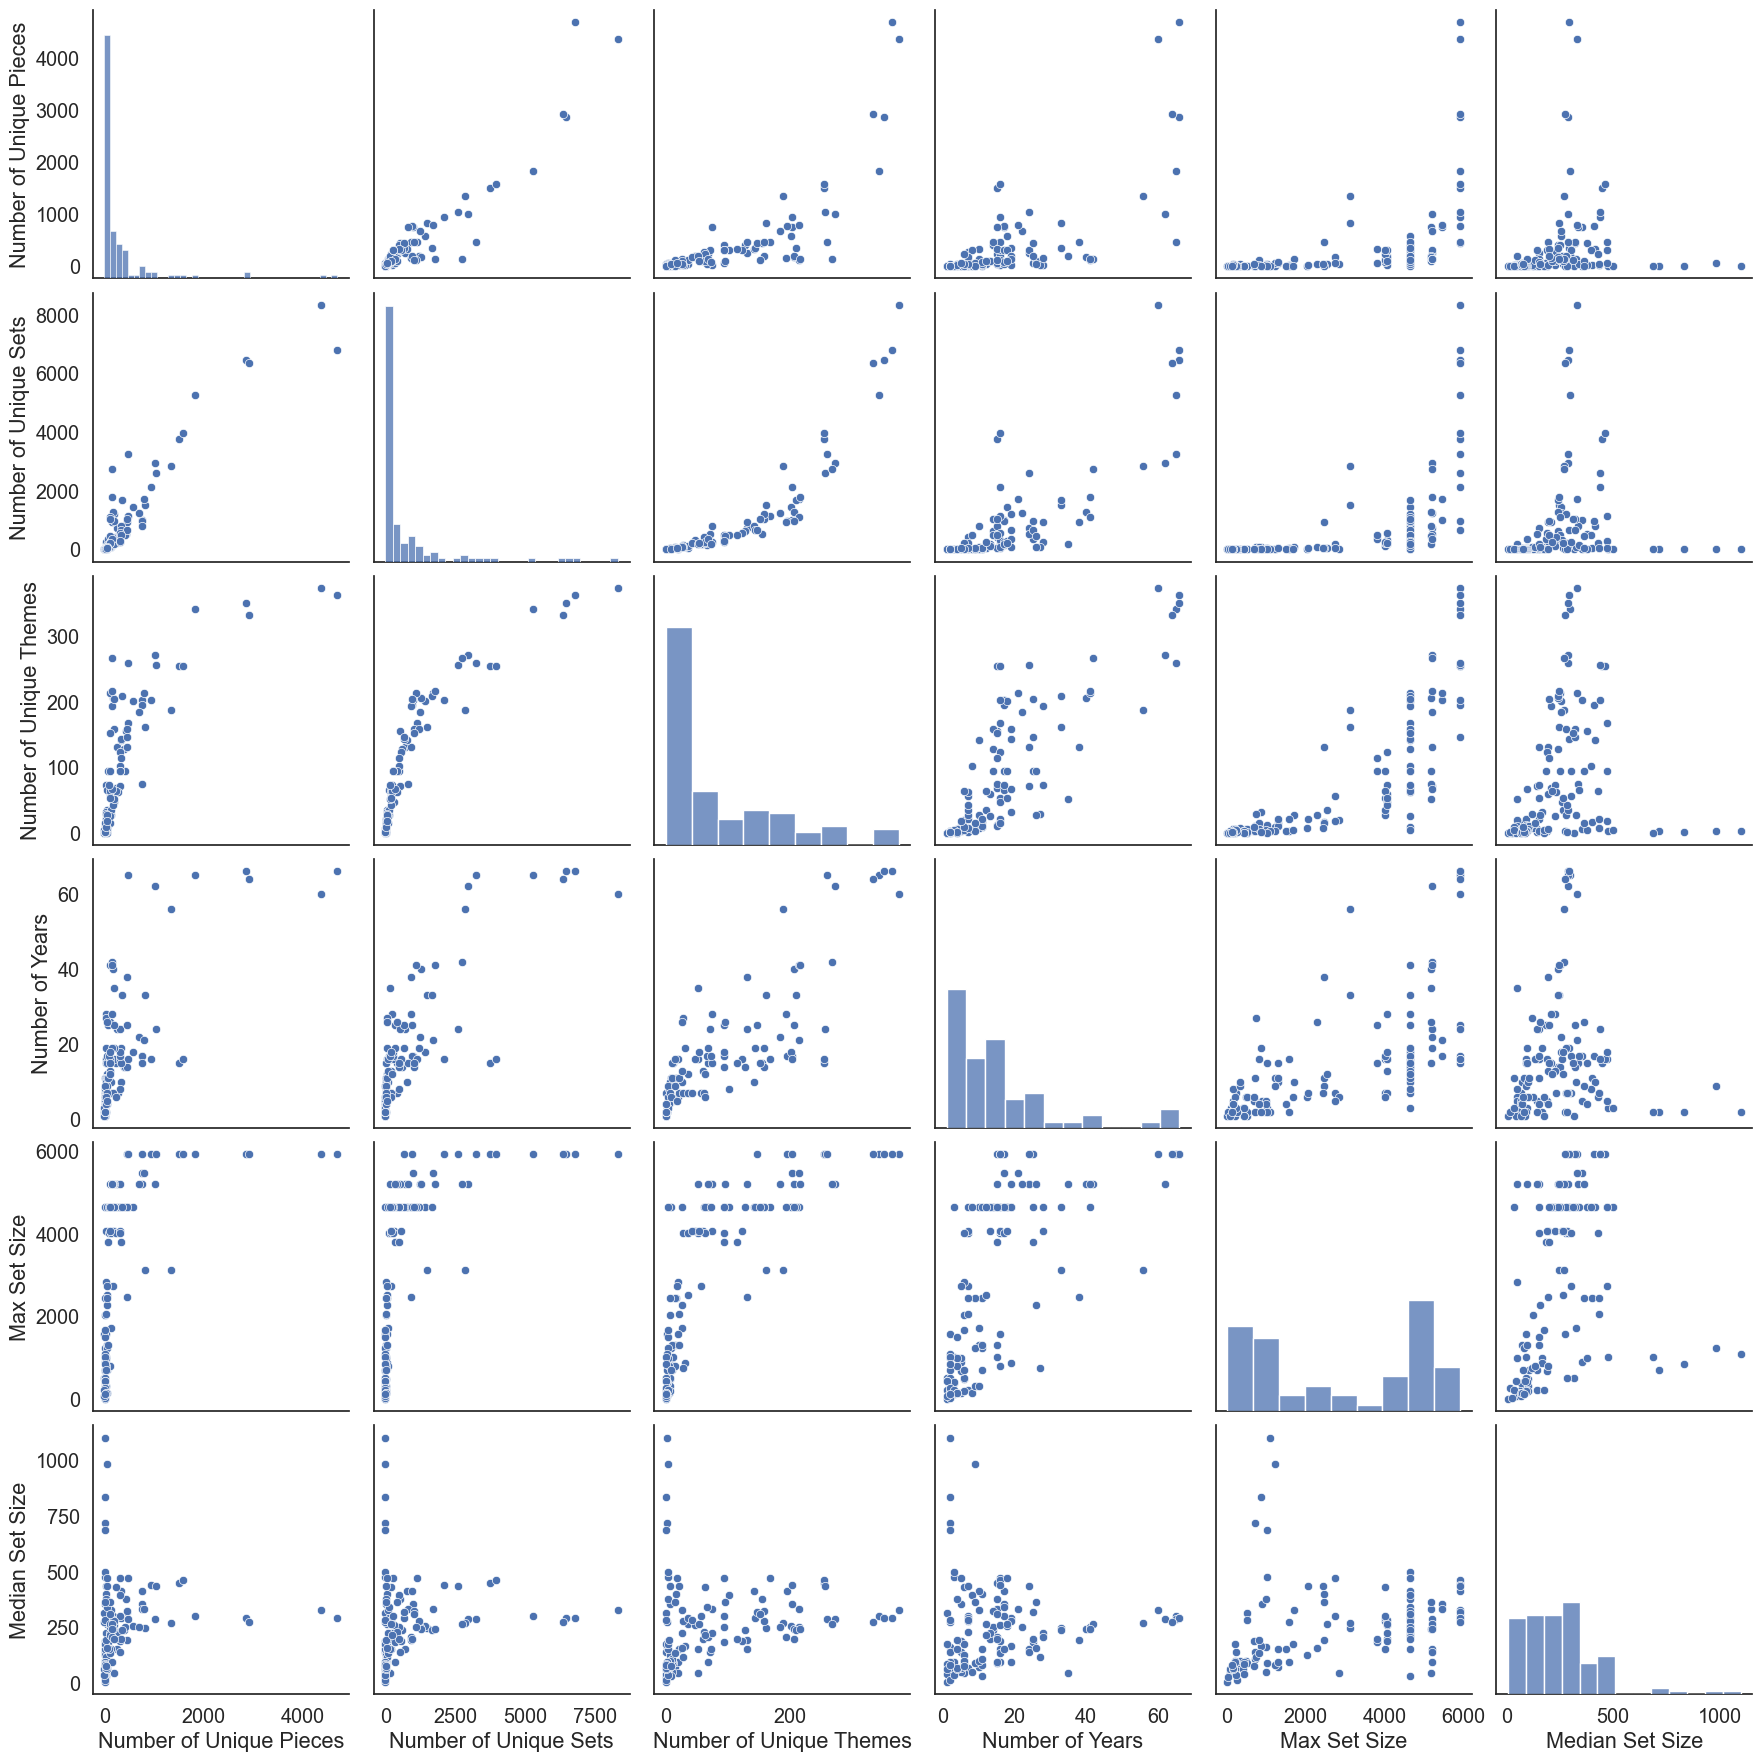

In [6]:
sns.pairplot(lego_colors, height=3)

C:\Users\jorda\AppData\Local\Temp\ipykernel_19852\1186032274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lego_colors.corr(), annot=True)


<AxesSubplot: >

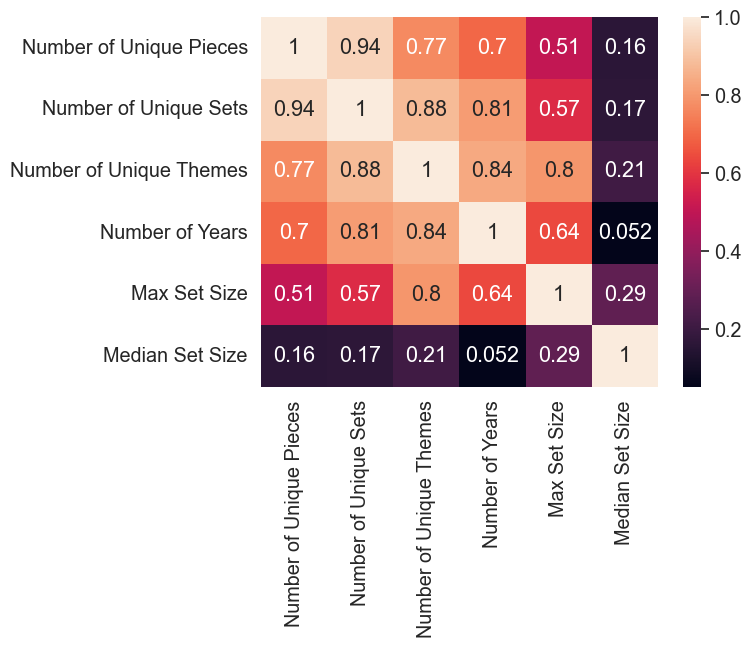

In [7]:
sns.heatmap(lego_colors.corr(), annot=True)

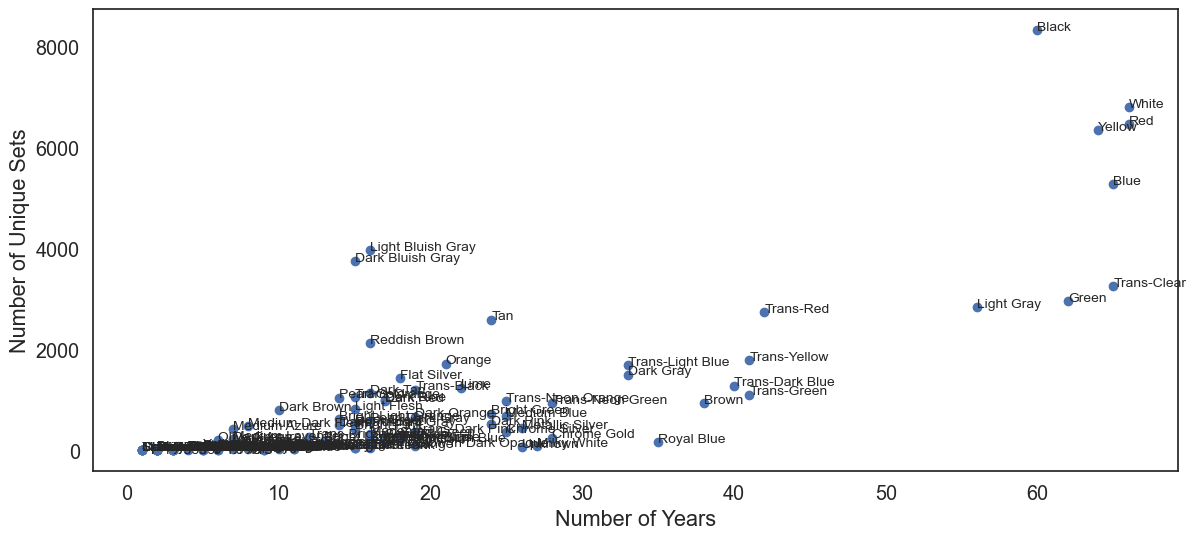

In [8]:
# All the colors based on number of sets and years
plt.figure(figsize=(14,6))
plt.scatter(lego_colors["Number of Years"], lego_colors["Number of Unique Sets"])
plt.xlabel('Number of Years')
plt.ylabel('Number of Unique Sets')

for i, row in enumerate(lego_colors.values):
    plt.annotate(row[0],xy=(row[4],row[2]),fontsize=10)

In [16]:
# A few useful subsets
colors = lego_colors["Color"]
lego_colors_vals_only = lego_colors.drop(["Color"], axis=1)

## Clustering

First view skatters of all relationships to look for patterns

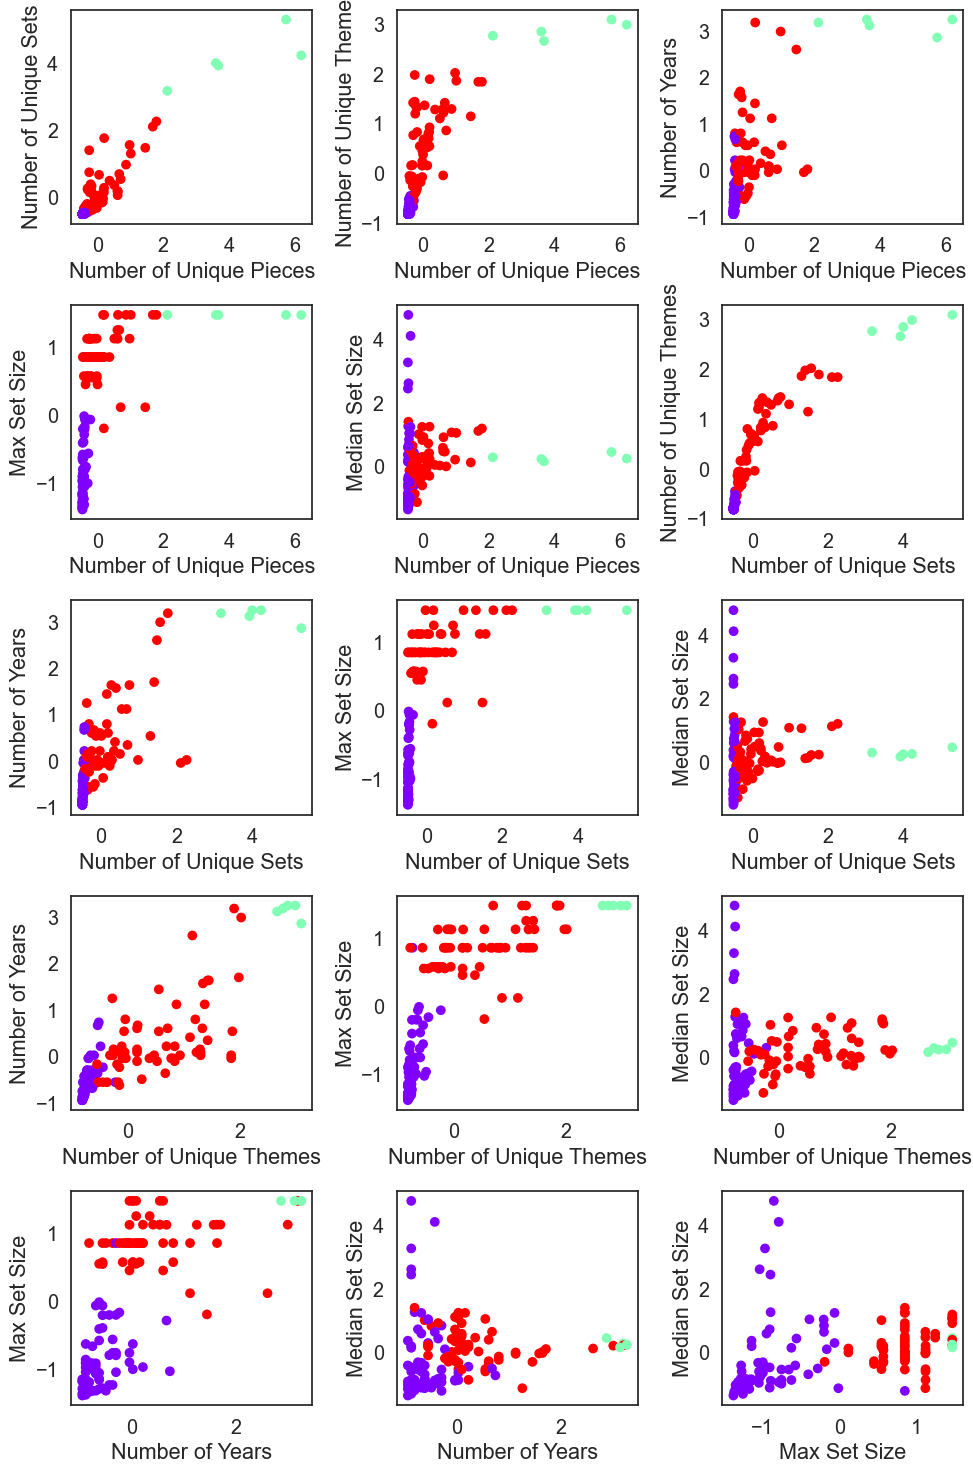

In [22]:
# Standardize the numerical columns ['Number of Unique Pieces', 'Number of Unique Sets', 'Number of Unique Themes', 'Number of Years', 'Max Set Size', 'Median Set Size']
numerical_cols = ['Number of Unique Pieces', 'Number of Unique Sets', 'Number of Unique Themes', 'Number of Years', 'Max Set Size', 'Median Set Size']
lego_colors[numerical_cols] = StandardScaler().fit_transform(lego_colors[numerical_cols])

# Create the clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(lego_colors[numerical_cols])
  
# Get all combinations of columns
combinations = list(itertools.combinations(numerical_cols, 2))

# Plot all combinations
fig, ax = plt.subplots(5, 3, figsize=(10, 15))
ax = ax.ravel()

for i, (col1, col2) in enumerate(combinations):
    ax[i].scatter(lego_colors[col1], lego_colors[col2], c=agg_cluster.labels_, cmap='rainbow')
    ax[i].set_xlabel(col1)
    ax[i].set_ylabel(col2)
plt.tight_layout()
plt.show()

Remove 'Median Set Size' as it has least correlation with any other variables

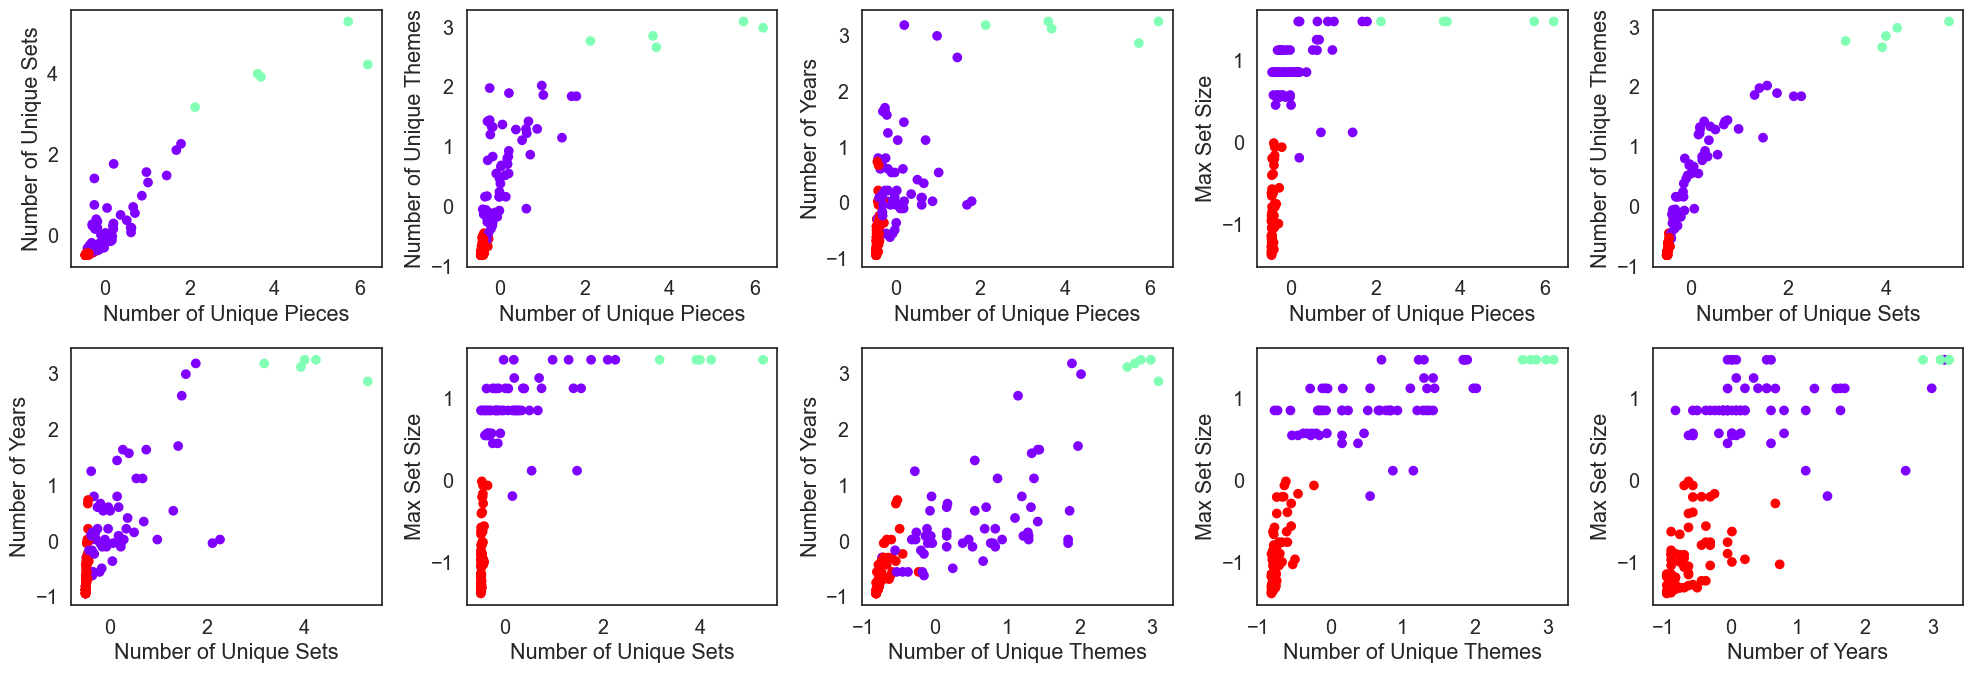

In [31]:
# Standardize the numerical columns ['Number of Unique Pieces', 'Number of Unique Sets', 'Number of Unique Themes', 'Number of Years', 'Max Set Size', 'Median Set Size']
numerical_cols = ['Number of Unique Pieces', 'Number of Unique Sets', 'Number of Unique Themes', 'Number of Years', 'Max Set Size']
lego_colors[numerical_cols] = StandardScaler().fit_transform(lego_colors[numerical_cols])

# Create the clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(lego_colors[numerical_cols])
  
# Get all combinations of columns
combinations = list(itertools.combinations(numerical_cols, 2))

# Plot all combinations
fig, ax = plt.subplots(2, 5, figsize=(20, 7))
ax = ax.ravel()

for i, (col1, col2) in enumerate(combinations):
    ax[i].scatter(lego_colors[col1], lego_colors[col2], c=agg_cluster.labels_, cmap='rainbow')
    ax[i].set_xlabel(col1)
    ax[i].set_ylabel(col2)
plt.tight_layout()
plt.show()

Try the most 'clustered': Max Set Size, Number of Years, Number of Unique Themes, ~Number Of Unique Pieces

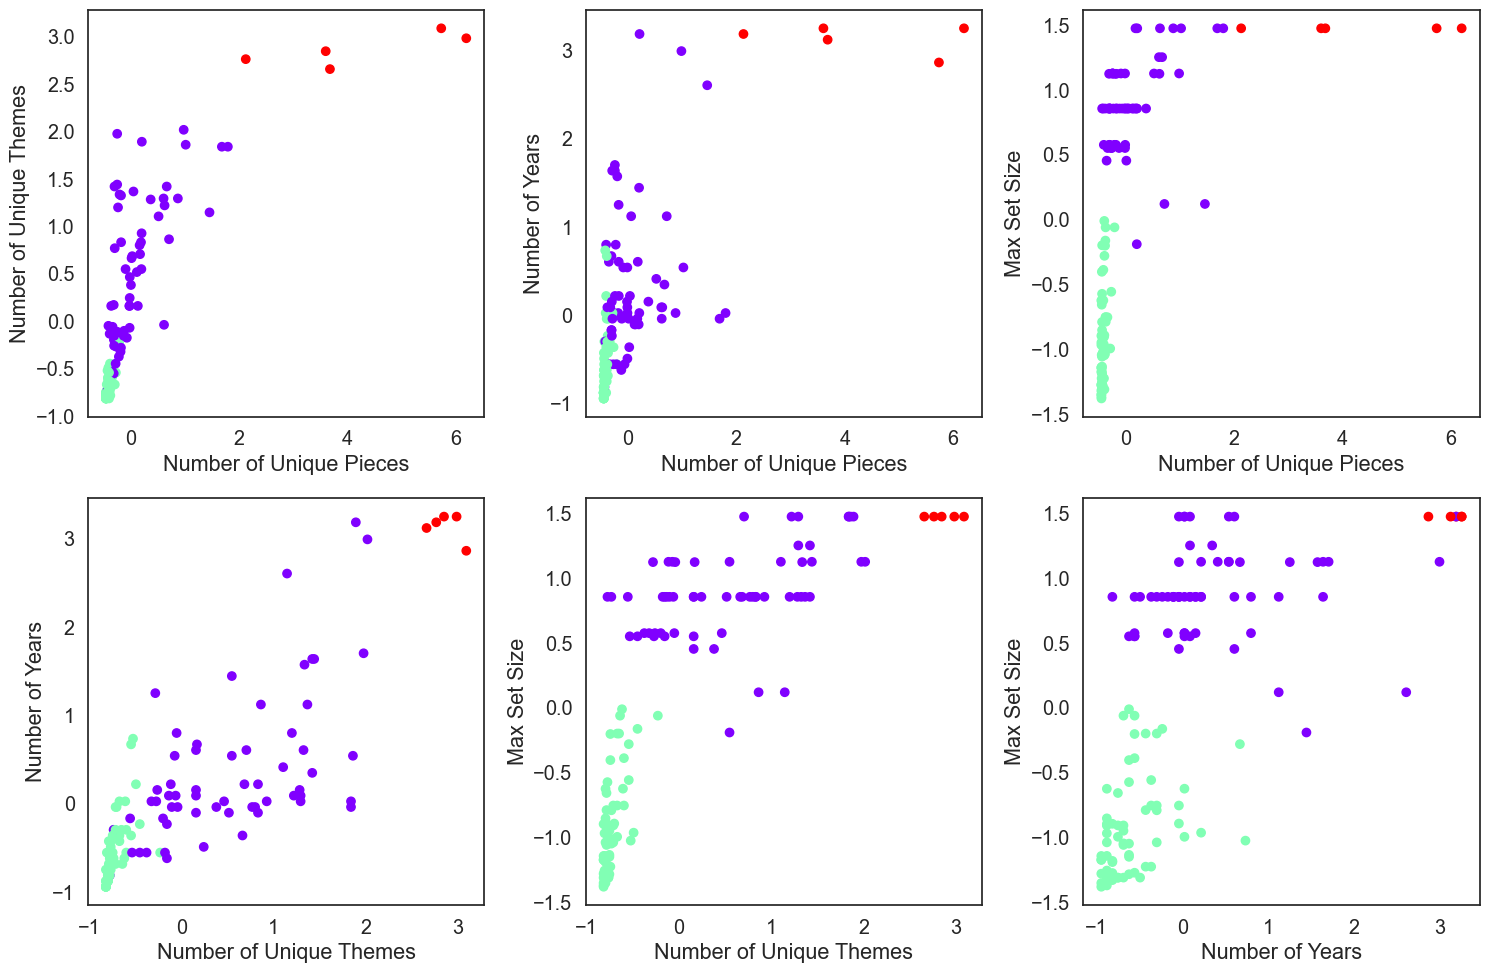

In [52]:
# Standardize the numerical columns ['Number of Unique Pieces', 'Number of Unique Sets', 'Number of Unique Themes', 'Number of Years', 'Max Set Size', 'Median Set Size']
numerical_cols = ['Number of Unique Pieces', 'Number of Unique Themes', 'Number of Years', 'Max Set Size']
lego_colors[numerical_cols] = StandardScaler().fit_transform(lego_colors[numerical_cols])

# Create the clustering model
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(lego_colors[numerical_cols])
  
# Get all combinations of columns
combinations = list(itertools.combinations(numerical_cols, 2))

# Plot all combinations
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.ravel()

for i, (col1, col2) in enumerate(combinations):
    ax[i].scatter(lego_colors[col1], lego_colors[col2], c=agg_cluster.labels_, cmap='rainbow')
    ax[i].set_xlabel(col1)
    ax[i].set_ylabel(col2)
plt.tight_layout()
plt.show()